# Section 29: Decision Trees

- online-ds-pt-100719
- 04/08/20


## ANNOUNCEMENTS

I apologize for how much study group times are shifting this week and next; this is only temporary to accomodate launch week of my new cohort. 
So here is the plan for our remaining Mod 3 study groups:
> #### 1. Tonight (04/09/20) at 7 PM EST, we will cover decision trees (sect 29). https://learn.co/study-groups/section-29-decision-trees-1
> #### 2. Tomorrow (Friday 04/10/20) at 7 PM EST we introduce the project early (so you can start hunting for datasets).https://learn.co/study-groups/intro-to-mod-3-project-how-to-pick-a-dataset
> #### 3. Saturday (04/11/20) at 3 PM EST we will cover Sect 30 (Ensemble Methods)https://learn.co/study-groups/section-30-ensemble-methods

> ### For next week:
> We have to shift our Tuesday study group to Wednesday (for just next week) to accommodate  the new cohort's orientation.
> #### 1. Wednesday (04/15/20) we will cover Sect 31: Support Vector Machines at 7 PM. https://learn.co/study-groups/sect-31-support-vector-machines 
> #### 2. Thursday (04/16)) we will have Mod 3 Project Office Hours at the usual time (7 PM EST) https://learn.co/study-groups/mod-3-project-office-hours-28

## Questions/Comments?:

- 

## Learning Objectives

- Data Partitioning Activity
- Decision Tree Visual Walkthrough
- Entropy and Information Gain
- Activity: Decision Trees to Predict Repeat Offender Criminals 
<!--- - [Hyperparamtere Tuning and Pruning Decision Trees](https://learn.co/tracks/data-science-career-v2/module-5-machine-learning-and-big-data/section-34-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees-lab)--->

# Introduction to Decision Trees

## Activity: Data Partitioning

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.20 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
from sklearn.datasets import make_blobs
np.random.seed(27)
plt.style.use('seaborn-talk')

In [3]:
def helper_create_plot(n=300):
    '''
    Create a plot to practice how a decision tree makes its cuts/decisions.
    '''
    X = []
    y = []

    for i in range(n):
        # Generate a random number
        nx = np.random.random()*10
        ny = np.random.random()*10
        X.append((nx,ny))

        if nx > 5:
            if ny > 1:
                y.append(0)
            else:
                y.append(1)
        else:
            if ny > 7:
                y.append(0)
            else:
                y.append(1)

    X = np.array(X)

    f, ax = plt.subplots(1)

    ax.scatter(X[:,0], X[:,1], c=y, s=20, cmap='Set1');
    plt.xticks(range(11));
    plt.xlabel('X1');
    plt.yticks(range(11));
    plt.ylabel('X2');
    
    return f, ax

def create_line(ax, direction, threshold, x_range=(0,10), y_range=(0,10), color='blue'):
    '''
    Creates a vertical or horizontal cut at threshold
    '''
    if direction == 'vertical':
        cut = lambda t: ax.vlines(t,y_range[0], y_range[1], colors=color)
    elif direction == 'horizontal':
        cut = lambda t: ax.hlines(t,x_range[0], x_range[1], colors=color)
    else:
        print('Direction does not exist')
        return
    
    cut(threshold)
    

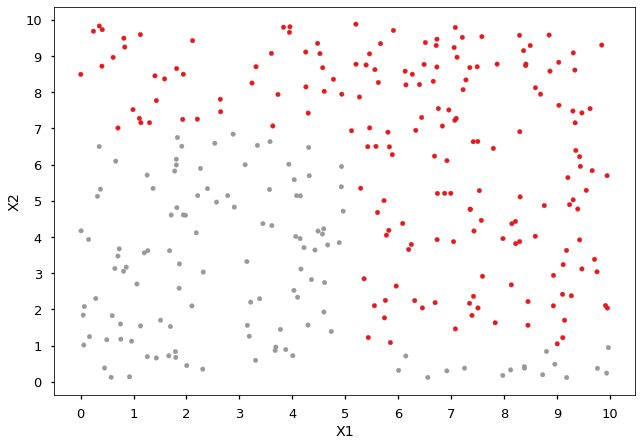

In [4]:
f,x = helper_create_plot()

### Q1: Looking at the example above, would a **vertical** or a **horizontal** cut better split the classes?

Also, what threshold should we use?

In [ ]:
# 'horizontal' or 'vertical'
q1_direction = None
# Between 0 and 10
q1_threshold = None

In [ ]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)

#### Solution

A **vertical** cut/line would do the best to split with a threshold at about **5**

In [ ]:
q1_direction = 'vertical'
q1_threshold = 5

f,ax = helper_create_plot();
create_line(ax,q1_direction, q1_threshold);

### Q2: Splitting further, what would be the next line & threshold to use?

In [ ]:
# 'horizontal' or 'vertical'
q2_direction = None
# Between 0 and 10
q2_threshold = None


In [ ]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction, q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

#### Solution:


A **horizontal** cut/line would do the best to split with a threshold at about **7**

In [ ]:
q2_direction = 'horizontal'
q2_threshold = 7

f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

### Q3:  again.

In [ ]:
# 'horizontal' or 'vertical'
q3_direction = None
# Between 0 and 10
q3_threshold = None

In [ ]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

#### Solution


A **horizontal** cut/line would do the best to split with a threshold at about **1**

In [ ]:
q3_direction = 'horizontal'
q3_threshold = 1

f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/ex-decision-tree.png" width=70%>




## Decision Trees Overview

- **DECISION TREES:**
    - Supervised Learning
    - Classification OR Regression
    - **[Interactive Visual Demonstration](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)**


- **ADVANTAGES**
    - Interpretability 
    - Render feature importance
    - Less data pre-processing needed
    
    
- **DISADVANTAGES**
    - "Greedy search" -  short sighted optimization
    - Do not predict a continuous output (for regression)
    - Does not predict beyond range of the training data
    - Overfits SUPER easily

<!---<img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-to-supervised-learning-online-ds-ft-100719/master/images/new_ml-hierarchy.png" width=60%>--->


## Direction Acyclic Graphs (DAG) Definition


- **Direction Acyclic Graph**
> A decision tree is a DAG type of classifier where each branch node represents a choice between a number of alternatives and each leaf node represents a classification. An unknown (or test) instance is routed down the tree according to the values of the attributes in the successive nodes. When the instance reaches a leaf, it is classified according to the label assigned to the corresponded leaf.

<img src='https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-decision-trees-online-ds-pt-100719/master/images/dt1.png' width=60%>

# Entropy and Information Gain

## Entropy and decision trees


> Decision trees aim to tidy the data by separating the samples and re-grouping them in the classes they belong to.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-entropy-and-information-gain-online-ds-ft-100719/master/images/split_fs.png" width=400>


## Shannon's Entropy

> __Entropy is a measure of disorder or uncertainty.__
> 
> The entropy of a variable is the "amount of information" contained in the variable. 
>
> - We can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. 

$$\large H(S) = -\sum (P_i . log_2(P_i))$$

When  $H(S) = 0$, this means that the set $S$ is perfectly classified, meaning that there is no disorganization in our data because all of our data in S is the exact same class. 





## Information Gain


> __Information gain is an impurity/uncertainty based criterion that uses the entropy as the measure of impurity.__ 


$$Information~Gain  = Entropy_{parent} - Entropy_{child}.[child ~weighted ~average]$$


$$\large IG(A, S) = H(S) - \sum{}{p(t)H(t)}  $$

Where:

* $H(S)$ is the entropy of set $S$
* $t$ is a subset of the attributes contained in $A$ (we represent all subsets $t$ as $T$)
* $p(t)$ is the proportion of the number of elements in $t$ to the number of elements in $S$
* $H(t)$ is the entropy of a given subset $t$ 

In the ID3 algorithm, we use entropy to calculate information gain, and then pick the attribute with the largest possible information gain to split our data on at each iteration. 


# Decision Tree Process

1. There are features and a target (either class or value)


2. Train the tree to make a *decision* (a split) about which feature best separates the data, based on some *metric* 
    - Data are split into partitions/branches
    - Metrics include 'Gini Index', 'Information Gain'
    
    
3. Continue growing each branch of the tree until a stopping criterion is reached.


4. Keep doing that until a **stopping condition** is hit.
    - Number of data points in a final partition
    - Layers deep
    
5. Test the trees decisions using previously unseen data.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-decision-trees-online-ds-ft-100719/master/images/dt3.png" width=65%>

# Implementation with sklearn

In [6]:
url="https://raw.githubusercontent.com/jirvingphd/dsc-decision-trees-with-sklearn-codealong-online-ds-pt-100719/master/tennis.csv"
df = pd.read_csv(url)
df['windy'] = df['windy'].astype(int)
df['play'] = df['play'].map({'no':0,'yes':1})
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,0,0
1,sunny,hot,high,1,0
2,overcast,hot,high,0,1
3,rainy,mild,high,0,1
4,rainy,cool,normal,0,1


In [8]:
y = df['play'].copy()
X =  df.drop(columns=['play']).copy()
X

,outlook,temp,humidity,windy
0,sunny,hot,high,0
1,sunny,hot,high,1
2,overcast,hot,high,0
3,rainy,mild,high,0
4,rainy,cool,normal,0
5,rainy,cool,normal,1
6,overcast,cool,normal,1
7,sunny,mild,high,0
8,sunny,cool,normal,0
9,rainy,mild,normal,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train)

def remake_df(X_split, X_df,encoder):
    return pd.DataFrame(X_split, columns=encoder.get_feature_names(X_df.columns), index=X_df.index)

X_train_ohe = encoder.transform(X_train).toarray()
X_test_ohe = encoder.transform(X_test).toarray()


X_train_ohe = remake_df(X_train_ohe,X_train,encoder)
X_test_ohe = remake_df(X_test_ohe,X_test,encoder)

X_test_ohe

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_0,windy_1
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
11,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



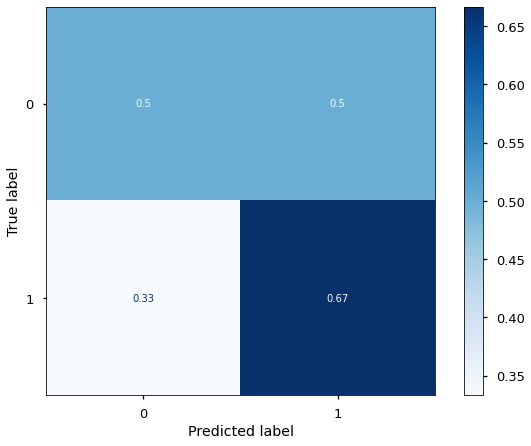

In [16]:
from sklearn import metrics
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe,y_train)
y_hat_test = clf.predict(X_test_ohe)

print(metrics.classification_report(y_test,y_hat_test))
metrics.plot_confusion_matrix(clf,X_test_ohe,y_test,cmap='Blues',
                              normalize='true')

## Plot the decision tree 

You can see what rules the tree learned by plotting this decision tree. To do this, you need to use additional packages such as `pytdotplus`. 

> **Note:** If you are run into errors while generating the plot, you probably need to install `python-graphviz` in your machine using `conda install python-graphviz`. 

> NOTE ON INSTALLING GRAPHVIZ:
- On windows you must [download the Graphviz installer](https://www.graphviz.org/download/)(Choose the "stable" release), install it, and then add the `bin` folder inside of it to your system's Path.
- [To Edit your path on MaC](https://www.architectryan.com/2012/10/02/add-to-the-path-on-mac-os-x-mountain-lion/)

- [TO Edit Your Path on Windows (10)](https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/)

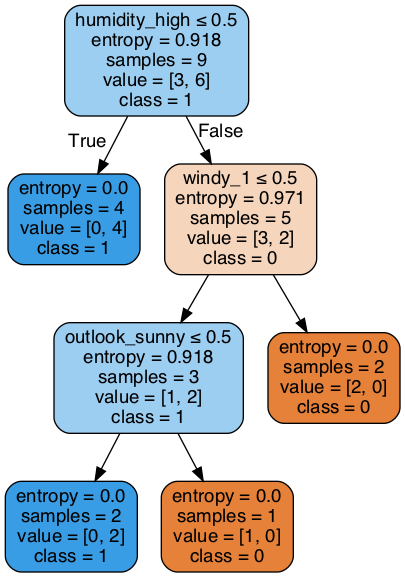

In [17]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X_train_ohe.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
metrics.accuracy_score(y_test,y_hat_test)

# Activity: Iowa Prisoners

In [29]:
# df2 = fs.datasets.load_iowa_prisoners(vers='raw')
# df2.head()

In [30]:
# # prisoners = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/iowa_recidivism_renamed.csv"

df = fs.datasets.load_iowa_prisoners(vers='clean',read_csv_kwds={'index_col':0})
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


In [31]:
df= df.drop(columns=['yr_released'])

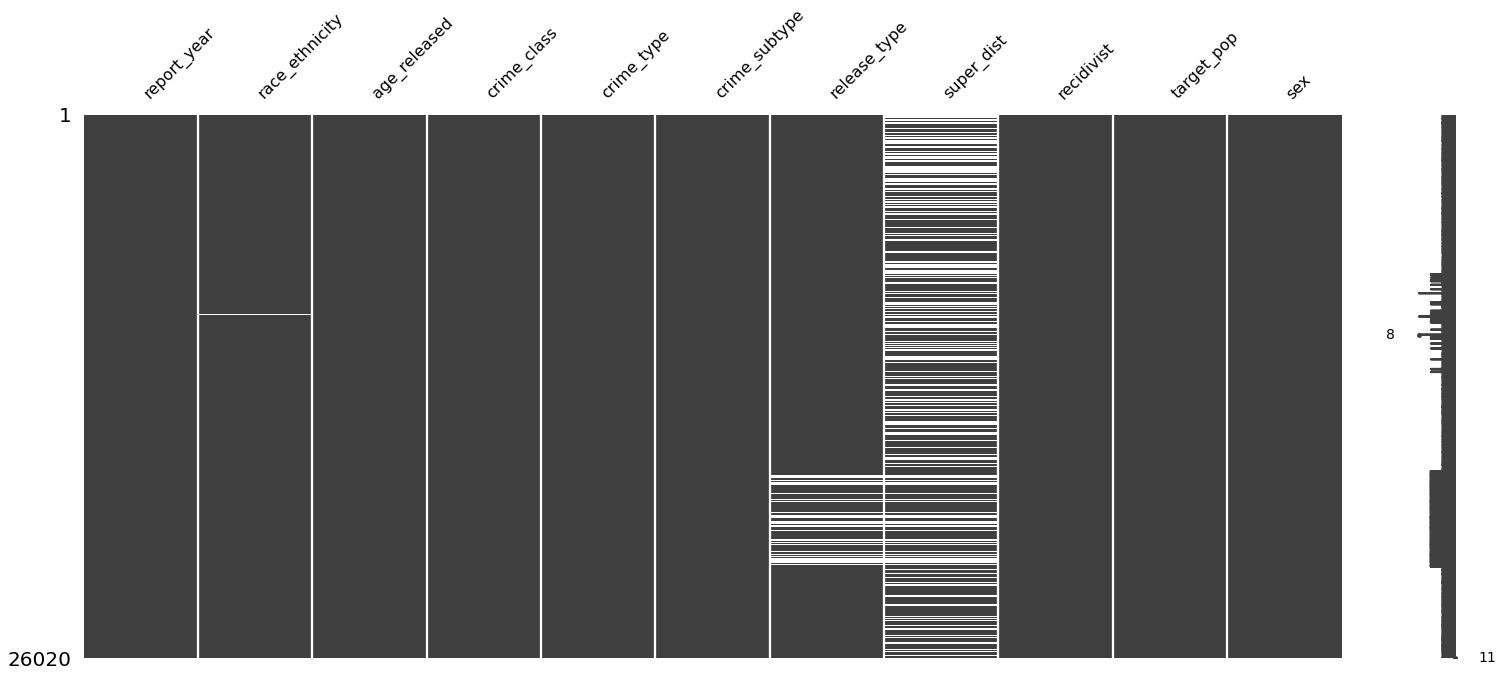

In [33]:
import missingno
missingno.matrix(df)

In [34]:
df.isna().sum().divide(len(df))*100

report_year        0.000000
race_ethnicity     0.115296
age_released       0.011530
crime_class        0.000000
crime_type         0.000000
crime_subtype      0.000000
release_type       6.771714
super_dist        36.821676
recidivist         0.000000
target_pop         0.000000
sex                0.011530
dtype: float64

In [35]:
df['race_ethnicity'].value_counts()

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
American Indian or Alaska Native - Hispanic           20
White -                                               12
Asian or Pacific Islander - Hispanic                   5
N/A -                                                  5
Black -                                                2
Name: race_ethnicity, dtype: int64

In [36]:
df['super_dist'].value_counts(dropna=False)

NaN                   9581
5JD                   4982
1JD                   2787
2JD                   1988
8JD                   1556
7JD                   1514
3JD                   1188
6JD                   1098
4JD                    667
ISC                    350
Interstate Compact     309
Name: super_dist, dtype: int64

In [37]:
## Check for and address null values
drop_cols = ['race_ethnicity','age_released','sex']
df = df.dropna(subset=drop_cols)
df.isna().sum()

report_year          0
race_ethnicity       0
age_released         0
crime_class          0
crime_type           0
crime_subtype        0
release_type      1762
super_dist        9549
recidivist           0
target_pop           0
sex                  0
dtype: int64

In [38]:
df =  df.fillna('missing')
df.isna().sum()

report_year       0
race_ethnicity    0
age_released      0
crime_class       0
crime_type        0
crime_subtype     0
release_type      0
super_dist        0
recidivist        0
target_pop        0
sex               0
dtype: int64

In [39]:
## Inspect Value Counts for target
df['recidivist'].value_counts(normalize=True)

No     0.665948
Yes    0.334052
Name: recidivist, dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 11 columns):
report_year       25987 non-null int64
race_ethnicity    25987 non-null object
age_released      25987 non-null object
crime_class       25987 non-null object
crime_type        25987 non-null object
crime_subtype     25987 non-null object
release_type      25987 non-null object
super_dist        25987 non-null object
recidivist        25987 non-null object
target_pop        25987 non-null object
sex               25987 non-null object
dtypes: int64(1), object(10)
memory usage: 2.4+ MB


In [41]:
df['age_released'].value_counts()

25-34           9543
35-44           6217
Under 25        4585
45-54           4340
55 and Older    1302
Name: age_released, dtype: int64

In [42]:
age_map = {'25-34':30, '35-44':40,
           'Under 25': 20,
           '45-54':50,
           '55 and Older': 61}

df['age_released'] = df['age_released'].map(age_map)
df['age_released']

0        30
1        30
2        40
3        30
4        40
         ..
26015    20
26016    40
26017    30
26018    30
26019    40
Name: age_released, Length: 25987, dtype: int64

In [43]:
## Encode categorical features
df = pd.get_dummies(df, drop_first=True,
                    columns=df.drop(columns='age_released').columns)
df

,age_released,report_year_2014,report_year_2015,report_year_2016,report_year_2017,report_year_2018,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black -,...,super_dist_5JD,super_dist_6JD,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,recidivist_Yes,target_pop_Yes,sex_Male
0,30,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,1
1,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,40,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
3,30,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,20,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
26016,40,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
26017,30,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26018,30,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [44]:
y = df['recidivist_Yes']
X = df.drop(columns=['recidivist_Yes'])

## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

## Check target class counts
print(pd.Series(y_train).value_counts(normalize=True) )
pd.Series(y_test).value_counts(normalize=True)


0    0.663879
1    0.336121
Name: recidivist_Yes, dtype: float64


0    0.672156
1    0.327844
Name: recidivist_Yes, dtype: float64

## ADDRESSING IMBALANCED CLASSES

- Downsample/undersampling to match minority class.
- Synthetic Minority Over Sampling Technique (SMOTE)
-  Adaptive Synthetic (ADASYN)
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Downsampling_web.png" width=10%>

In [45]:
from imblearn.over_sampling import ADASYN,SMOTE

## Use SMOTE to resample X_train, y_train
smote=SMOTE()

X_train, y_train = smote.fit_sample(X_train, y_train)
print(pd.Series(y_train).value_counts() )
pd.Series(y_test).value_counts()

Using TensorFlow backend.
//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a futu

1    12939
0    12939
Name: recidivist_Yes, dtype: int64


0    4367
1    2130
Name: recidivist_Yes, dtype: int64

In [ ]:
# ## Undersampling to match smallest class
# df_yes = df.groupby('recidivist').get_group('Yes')
# df_no = df.groupby('recidivist').get_group('No')

# sample_size = min(len(df_yes),len(df_no))
# sample_size

# sample_state = 123
# np.random.seed(sample_state)

# df_samp = pd.concat([df_yes.sample(sample_size,random_state=sample_state),
#                 df_no.sample(sample_size,random_state=sample_state)],axis=0)
# df_samp['recidivist'].value_counts()

In [ ]:
# y_resampled = df_ohe['recidivist_Yes']
# X_resampled = df_ohe.drop(columns=['recidivist_Yes'])
# # y = df_le['recidivist']
# # X = df_le.drop(columns=['recidivist'])

# X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled)
# X_train.shape, y_test.shape


## Defining the Problem & Fitting a Decision Tree

Now, import the necessary packages and fit a decision tree to predict whether or not a mushroom is poisonous (this is stored under the 'class' feature as 'e' for edible, or 'p' for poisonous.

### Functions from Prior Classes

In [47]:
# def plot_confusion_matrix(cm, classes=None, normalize=False,cmap=None,
#                           title='Confusion Matrix',title_font={'size':14},
#                           annot_kws={'size':10,'weight':50}, 
#                           axislabel_font={'size':14,'weight':70}, 
#                           tick_font={'size':12,'weight':50},x_rot =45, y_rot=0,
#                          fig_kws={'figsize':(5,5)}):
#     """ Plots a confusion matrix of either a pre-calculated cm or a tuple of (y_true,y_pred) as cm.
    
#     Args:
#         cm (array or tuple): Either a confusion amtrix from sklearn or (y_true,y_pred) tuple
#         classes (list, optional): Names of classes to use. Defaults to integers 0 to len(cm).
#         normalize (bool, optional): Annotate class-percentages instead of counts. Defaults to False.
#         cmap (cmap, optional): colormap to use Defaults to plt.get_cmap("Blues").
#         title (str, optional): Plot title. Defaults to 'Confusion Matrix'.
#         title_font (dict, optional): fontdict for set_title. Defaults to {'size':14}.
#         annot_kws (dict, optional): kws for ax.Text annotations. Defaults to {'size':10,'weight':50}.
#         axislabel_font (dict, optional): fontdict for ylabel,xlabel. Defaults to {'size':14,'weight':70}.
#         tick_font (dict, optional): kws for plt.xticks/yticks. Defaults to {'size':12,'weight':50}.
#         x_rot (int, optional): Rotation of x-axis tick labels. Defaults to 45.
#         y_rot (int, optional): Rotation of y-axis tick labels.Defaults to 0.
#         fig_kws (dict, optional): kws for plt.subplots. Defaults to {}.
    
#     Returns:
#         fig,ax: matplotlib Figure & Axes
#     """
#     import itertools
#     import numpy as np
#     import matplotlib.pyplot as plt
#     from mpl_toolkits.axes_grid1 import make_axes_locatable
#     import sklearn.metrics as metrics
    
#     ## If (y_true,y_pred) passed as cm
#     if isinstance(cm, tuple):
#         cm = metrics.confusion_matrix(*cm)
        
#     ## if normalize:  normalize counts to class-accuracy
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        

    
#     ## Setting & updating default kws
#     subplots_kws = {}
#     subplots_kws.update(fig_kws)
    
#     ## Annotation kws
#     text_kws = dict(horizontalalignment="center")
#     text_kws.update(annot_kws)    
    
#     ## Axis Labels
#     axlabel_kws = dict(size=12, weight='bold')
#     axlabel_kws.update(axislabel_font)
    
#     ## Tick Labels
#     ticklabel_kws = dict(size=10)
#     ticklabel_kws.update(tick_font)
    

#     ## Define classes if not 
#     if classes is None:
#         classes = list(range(len(cm)))
        
#     ## Default cmap
#     if cmap is None:
#         cmap = plt.get_cmap("Blues")



#     ## Create fig,ax and plot iamge
#     fig, ax = plt.subplots(**subplots_kws)
    
#     im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.set_title(title,fontdict=title_font)

    
#     ## Create Ticks
#     tick_marks = np.arange(len(classes))
    
#     plt.xticks(tick_marks, classes, rotation=x_rot,**ticklabel_kws)
#     plt.yticks(tick_marks, classes, rotation=y_rot,**ticklabel_kws)

#     ## Set annotation fmt and color threshold
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
    
#     ## Add cm labels
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         # text_kws.update(color=color)
#         ax.text(j, i, format(cm[i, j], fmt),color="white" if cm[i, j] > thresh else "black",fontdict=text_kws)
                
#     ## Set axis labels
#     ax.set_ylabel('True Label',fontdict=axislabel_font)
#     ax.set_xlabel('Predicted Label',fontdict=axislabel_font)
     
#     ## Add colorbar
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)
#     fig.colorbar(im,cax=cax)     

# #     plt.tight_layout()

#     return fig,ax



# def plot_auc_roc_curve(y_test, y_test_pred,figsize=(8,4)):
#     """ Takes y_test and y_test_pred from a ML model and uses sklearn roc_curve to plot the AUC-ROC curve."""
#     from sklearn.metrics import roc_curve, auc, roc_auc_score
#     import matplotlib.pyplot as plt
    
#     assert y_test.shape==y_test_pred.shape
#     auc = roc_auc_score(y_test, y_test_pred)#[:,1])

#     FPr, TPr, _  = roc_curve(y_test, y_test_pred)#[:,1])
# #     auc()
#     fig,ax=plt.subplots(figsize=figsize)
#     ax.plot(FPr, TPr,label=f"AUC for Classifier:\n{round(auc,2)}" )

#     ax.plot([0, 1], [0, 1],  lw=2,linestyle='--')
#     ax.set_xlim([-0.01, 1.0])
#     ax.set_ylim([0.0, 1.05])

#     ax.set_xlabel('False Positive Rate')
#     ax.set_ylabel('True Positive Rate')
#     ax.set_title('Receiver Operating Characteristic (ROC) Curve')
#     ax.legend(loc="lower right")
# #     plt.show()
#     return fig, ax

## Vanilla DecisionTree (baseline)

In [49]:
## Fit a vanilla DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

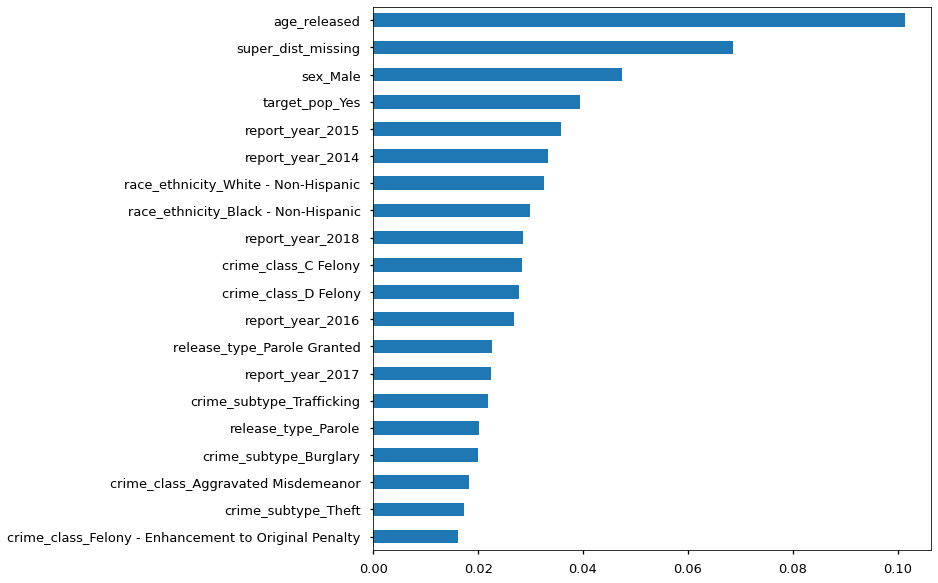

In [50]:
def plot_importance(tree, top_n=20,figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=X_train.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize)
    return df_importance
plot_importance(tree);

In [51]:
# ## Plot feature importance 
# def plot_importance():
#     pass

(<Figure size 576x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c41198358>)

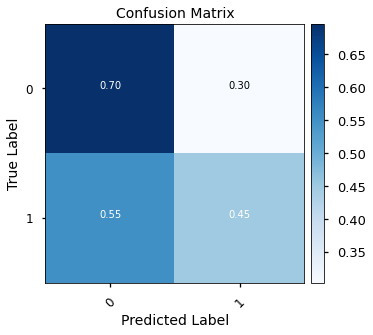

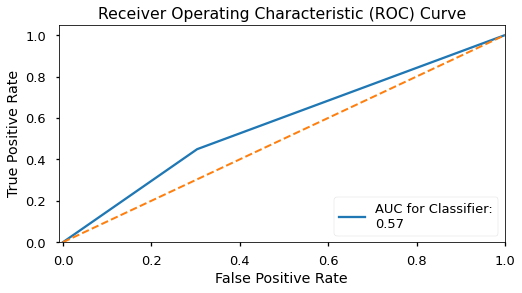

In [52]:
## Get Precitions
y_hat_test = tree.predict(X_test)

plot_confusion_matrix((y_test,y_hat_test),normalize=True)
plot_auc_roc_curve(y_test,y_hat_test)

In [61]:
import sys,os

folder = '../'
sys.path.append(folder+'py_files/')

In [76]:
import classification as cl
fs.ihelp(cl.evaluate_classification)

------------------------------------------------------------------------------------
------ HELP ------------------------------------------------------------------------

Help on function evaluate_classification in module classification:

evaluate_classification(y_true, y_pred, X_true, clf)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def evaluate_classification(y_true, y_pred,X_true, clf): 
    import sklearn.metrics as metrics
     
    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))
 
    fig, ax = plt.subplots(figsize=(10,5),ncols=2)
    metrics.plot_confusion_matrix(clf,X_true,y_true,cmap="Greens",
                                  normalize='true',ax=ax[0])
    ax[0].set(title='Confusion Matrix')
    y_score = clf.predict_proba(X_true)[:,1]

    fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
    # print(f"ROC-area-under-the-curve= {}")
    roc_auc = round(metrics.auc(fpr,tpr),3)
    ax[1].plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc})')
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].legend()
    ax[1].grid()
    ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')
    plt.tight_layout()

```

In [77]:
## Write a fucntion to evalute the model
import sklearn.metrics as metrics

def evaluate_model(y_true, y_pred,X_true,tree):
    print(metrics.classification_report(y_true, y_hat_test))
    try: 
        df_important = plot_importance(tree)
    except:
        df_important = None
    
    fig, ax = plot_confusion_matrix((y_true,y_pred),normalize=True)
    fig2, ax2 = plot_auc_roc_curve(y_true,y_pred)
    
    ## CLASS VERSION

    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))

    fig, ax = plt.subplots(figsize=(10,5),ncols=2)
    metrics.plot_confusion_matrix(clf,X_true,y_true,cmap="Greens",
                                  normalize='true',ax=ax[0])
    ax[0].set(title='Confusion Matrix')
    y_score = clf.predict_proba(X_true)[:,1]

    fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
    # print(f"ROC-area-under-the-curve= {}")
    roc_auc = round(metrics.auc(fpr,tpr),3)
    ax[1].plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc})')
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].legend()
    ax[1].grid()
    ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')
    plt.tight_layout()
#     return df_important

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      4367
           1       0.42      0.45      0.43      2130

    accuracy                           0.62      6497
   macro avg       0.57      0.57      0.57      6497
weighted avg       0.62      0.62      0.62      6497

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      4367
           1       0.42      0.45      0.43      2130

    accuracy                           0.62      6497
   macro avg       0.57      0.57      0.57      6497
weighted avg       0.62      0.62      0.62      6497



ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 82 

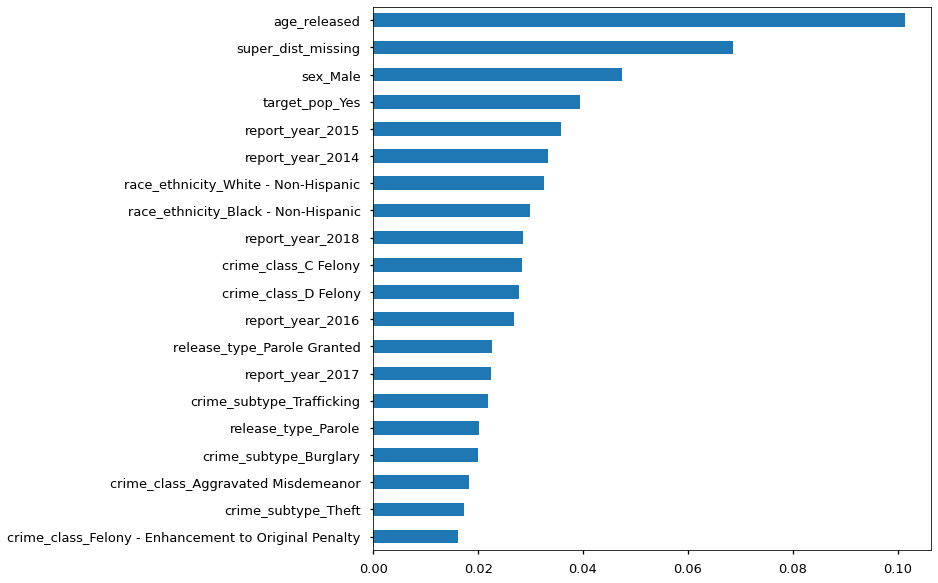

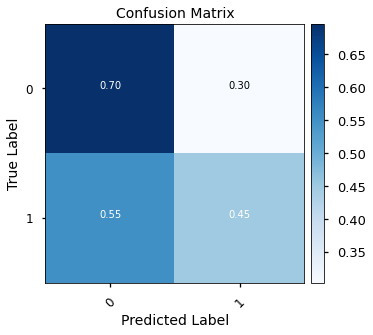

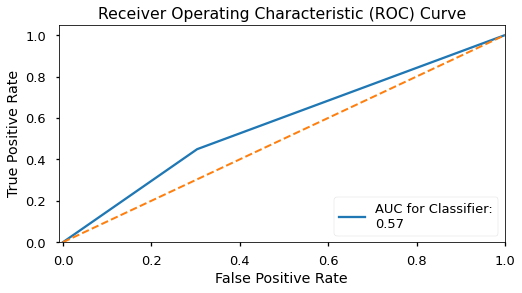

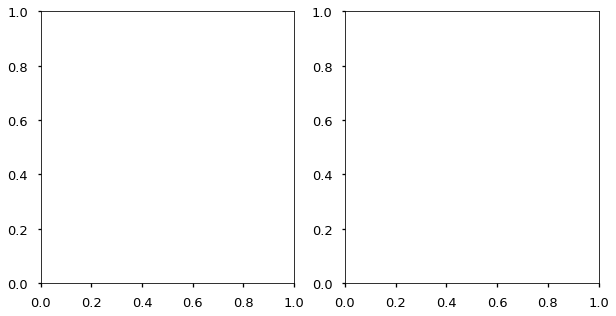

In [75]:
## Evaluate the model
evaluate_model(y_test,y_hat_test,X_test,tree)

## You can also visualize your Decision Trees

> Note: This requires installing graphviz which can be a painful installation.

In [93]:
## visualize the decision tree
def visualize_tree(tree,feature_names=None,class_names=['0','1'],export_graphviz_kws={}):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    from graphviz import Source
    from IPython.display import display
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None, rotate=False, filled = True)
    tree_viz_kws.update(export_graphviz_kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    graph = Source(export_graphviz(tree,feature_names=feature_names, class_names=class_names,**tree_viz_kws))
    display(SVG(graph.pipe(format='svg')))

In [96]:
# visualize_tree(tree,X.columns)

## GridSearchCV with DecisionTreeClassifier

In [97]:
class Timer():
    def __init__(self, start=True,time_fmt='%m/%d/%y - %T'):
        import tzlocal
        import datetime as dt
        
        self.tz = tzlocal.get_localzone()
        self.fmt= time_fmt
        self._created = dt.datetime.now(tz=self.tz)
        
        if start:
            self.start()
            
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(tz=self.tz)

        
    def start(self,verbose=True):
        self._laps_completed = 0
        self.start = self.get_time()
        if verbose: 
            print(f'[i] Timer started at {self.start.strftime(self.fmt)}')
    
    def stop(self, verbose=True):
        self._laps_completed += 1
        self.end = self.get_time()
        self.elapsed = self.end -  self.start
        if verbose: 
            print(f'[i] Timer stopped at {self.end.strftime(self.fmt)}')
            print(f'  - Total Time: {self.elapsed}')

In [99]:
X_train.shape

(25878, 77)

In [102]:
## Set up param grid
grid = {'max_depth': [3,5,10,15],
     'criterion': ['gini','entropy'],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,3,5,10],
       'max_features': [3,5,10,30,77]}#10,20,50,len(X.columns)]}


## Instantiate classifier
dt_clf = DecisionTreeClassifier()


## Instantiate GridSearchCV
gridsearch = GridSearchCV(dt_clf, param_grid=grid,cv=5)

## Start timer and fit search
timer = Timer()

tree_cv = gridsearch.fit(X_train, y_train)
timer.stop()
## Stop time and print best params
print(tree_cv.best_params_)

[i] Timer started at 01/21/20 - 13:18:24
[i] Timer stopped at 01/21/20 - 13:20:27
  - Total Time: 0:02:03.758873
{'criterion': 'gini', 'max_depth': 15, 'max_features': 77, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [103]:
## Create a tree with the gridsearch's best params
tree = DecisionTreeClassifier(**tree_cv.best_params_)
tree.fit(X_train,y_train)

## Get predictions for train and test
y_hat_test = tree.predict(X_test)
y_hat_train = tree.predict(X_train)


## Print classification report for train and test
print(f"[i] Training Data:\n{metrics.classification_report(y_train,y_hat_train)}",end='\n\n')
print(f"[i] Test Data:\n{metrics.classification_report(y_test,y_hat_test)}")
# print(metrics.confusion_matrix(y_test,y_hat_test))

## Evaluate Model using function

[i] Training Data:
              precision    recall  f1-score   support

           0       0.78      0.59      0.67     12939
           1       0.67      0.83      0.74     12939

    accuracy                           0.71     25878
   macro avg       0.73      0.71      0.71     25878
weighted avg       0.73      0.71      0.71     25878


[i] Test Data:
              precision    recall  f1-score   support

           0       0.78      0.55      0.64      4367
           1       0.42      0.67      0.52      2130

    accuracy                           0.59      6497
   macro avg       0.60      0.61      0.58      6497
weighted avg       0.66      0.59      0.60      6497



              precision    recall  f1-score   support

           0       0.78      0.55      0.64      4367
           1       0.42      0.67      0.52      2130

    accuracy                           0.59      6497
   macro avg       0.60      0.61      0.58      6497
weighted avg       0.66      0.59      0.60      6497



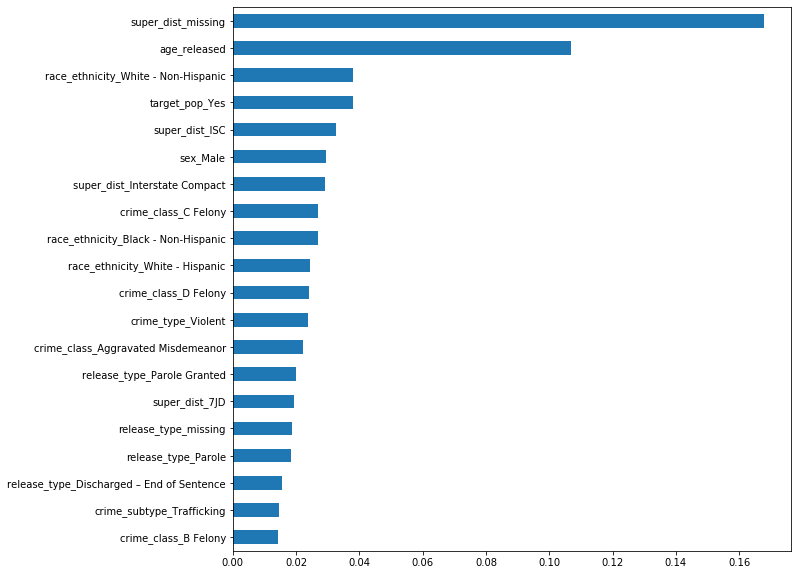

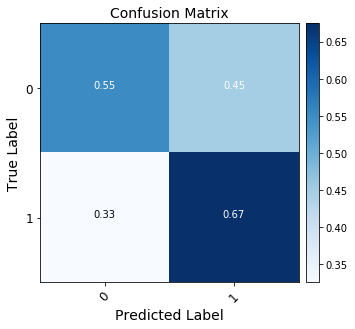

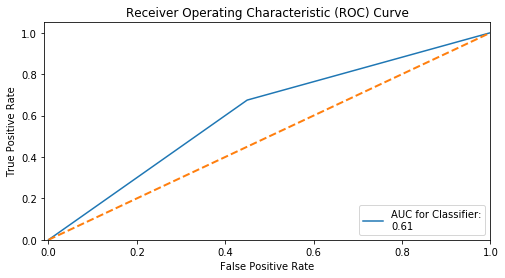

In [105]:
# visualize_tree(tree)
evaluate_model(y_test,y_hat_test,tree)

In [ ]:
# # Create the pipeline
# pipetree = Pipeline([('enc',LabelEncoder()),
#                      ('ohe',OneHotEncoder()),
#                     ('dt',DecisionTreeClassifier())])

# # pipe = Pipeline([('scl', MinMaxScaler()),
# #                 ('pca', PCA(n_components=10)),
# #                 ('svm', svm.SVC(random_state=123))])

# # Create the grid parameter
# grid = {'dt__max_depth': [3,5,10],
#      'dt__criterion': ['gini','entropy'],
#      'dt__min_samples_split':[2,5,10],
#      'dt__min_samples_leaf':[1,2,3]}
# @timeit
# def timed_search(pipe=pipetree, grid=grid):
#     randomsearch = RandomizedSearchCV(estimator=pipe,param_distributions=grid,verbose=1)

#     randomsearch.fit(X_train, y_train)
#     return randomsearch
# # # Create the grid parameter
# # grid = [{'svm__kernel': ['poly', 'sigmoid'],
# #          'svm__C': [0.01, 1, 100],
# #          'svm__degree0': [2,3,4,5],
# #          'svm__gamma': [0.001, 0.01]}]

# # # Create the grid, with "pipe" as the estimator
# # gridsearch = GridSearchCV(estimator=pipe,
# #                   param_grid=grid,
# #                   scoring='accuracy',
# #                   cv=3)

# # Fit using grid search
# # gridsearch.fit(X_train, y_train)

A single decision tree will often overfit your training data. There are steps one can take to help with this, like limiting the "depth" of the nodes. But it's often better to do something else: Plant another tree!

Of course, if a second tree is going to be of any value, it has to be *different from* the first. Here's a good algorithm for achieving that:

## Fitting a Set of Bagged Decision Trees

### Bagging Algorithm

Take a sample of your X_train and fit a decision tree to it. <br/>
Replace the first batch of data and repeat. <br/>
When you've got as many trees as you like, make use of all your individual trees' predictions to come up with some holistic prediction. (Most obviously, we could take the average of our predictions, but there are other methods we might try.)

<br/>

Because we're resampling our data with replacement, we're *bootstrapping*. <br/>
Because we're making use of our many samples' predictions, we're *aggregating*. <br/>
Because we're bootstrapping and aggregating all in the same algorithm, we're *bagging*.

In [106]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [107]:
bag = BaggingClassifier(n_estimators=100)
bag.fit(X_train, y_train)
print(bag.score(X_test, y_test))


0.6178236108973373


              precision    recall  f1-score   support

           0       0.74      0.67      0.70      4367
           1       0.43      0.51      0.47      2130

    accuracy                           0.62      6497
   macro avg       0.58      0.59      0.58      6497
weighted avg       0.64      0.62      0.63      6497



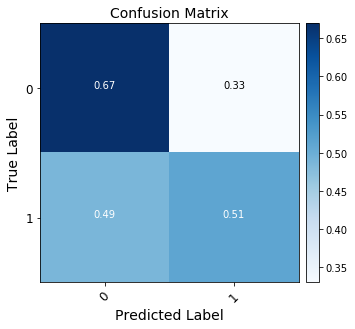

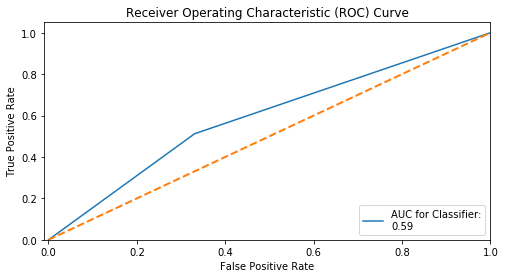

In [108]:
y_hat_test = bag.predict(X_test)

evaluate_model(y_test,y_hat_test,bag)

## Hyper Parameter Tuning with Trees
## TO DO: 
https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-29-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees


### Hyperparameters
- Useful to consider to make sure you don't overfit or underfit

Check out the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- `max-depth`
- `min_samples_leaf`: The smallest number of samples that can be in a leaf (node)
- `min_samples_split`: The smallest number of samples in a leaf (node) before splitting it
- `max_features`: Most features to consider when splitting

## SEE LABS FROM CLASS FOLDER FOR HYPERPARAMETER TUNING NOTEBOOK

# Questions / Comments